Successfully generated 36882 labels
Unique labels: [-2 -1  0  1]
Label counts: {-1: np.int64(24321), 0: np.int64(9066), 1: np.int64(3146), 2: np.int64(349)}


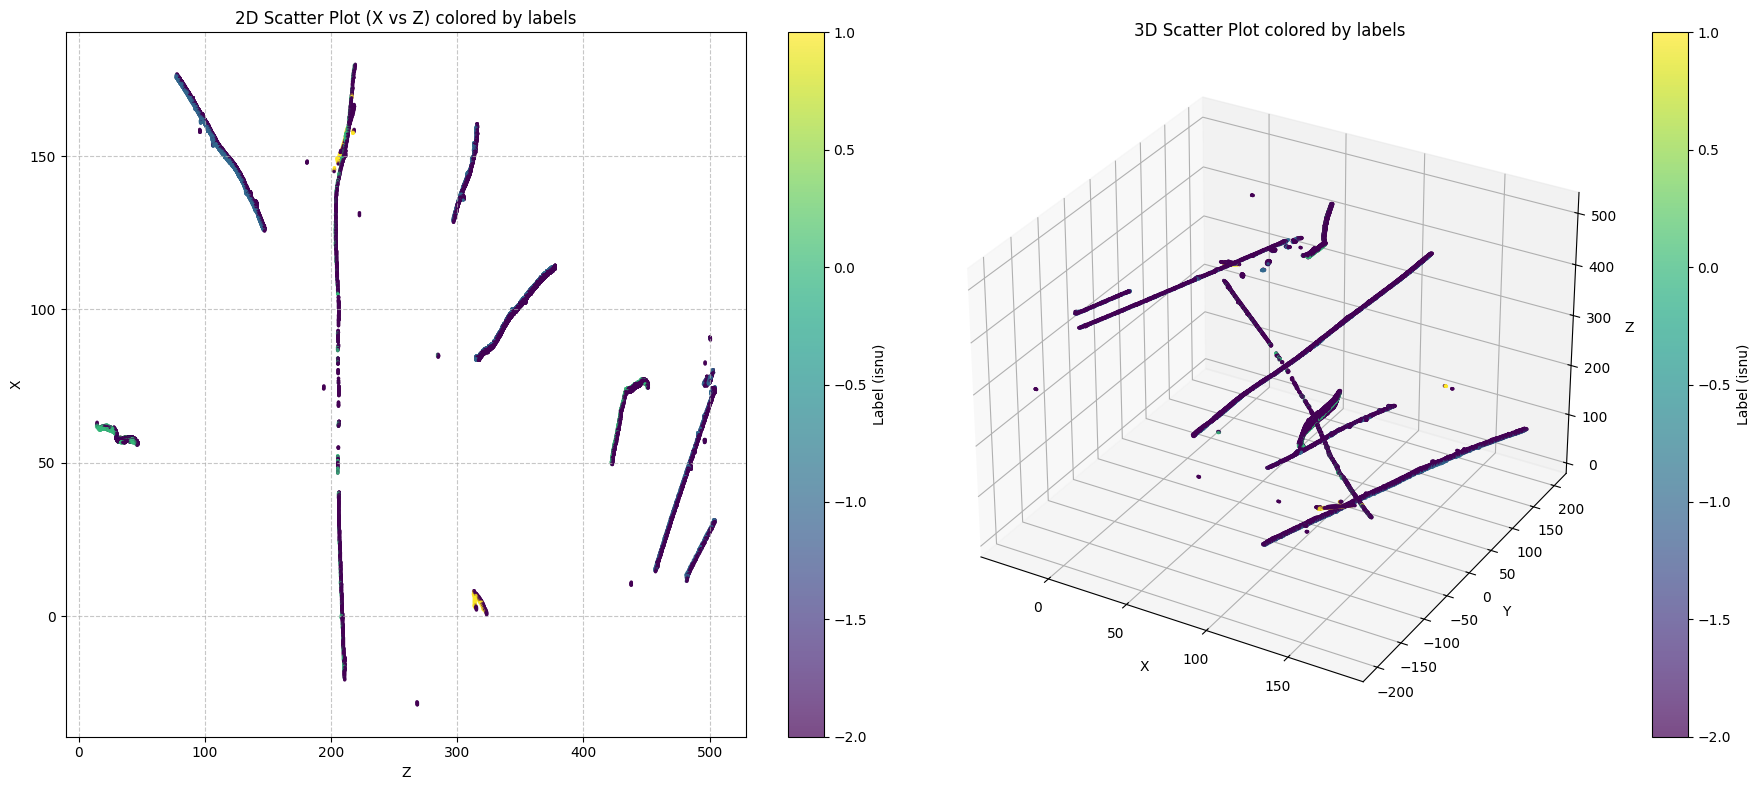

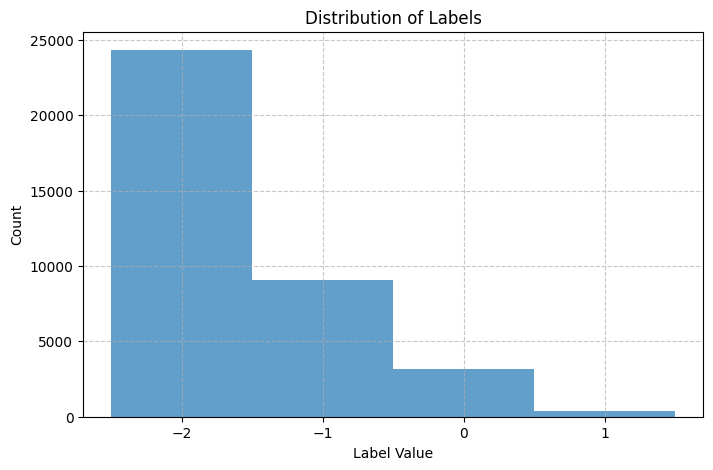

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sys
import os
import json
from dlclus.prep.labeler import get_isnu_labels

import matplotlib.pyplot as plt

# Define file paths
truth_file = "/exp/sbnd/app/users/yuhw/dl-clustering/sample/20250618/77451011_0/tru-apa1-9.json"
g2f_file = "/exp/sbnd/app/users/yuhw/dl-clustering/sample/20250618/77451011_0/rec-apa1-9.npz"

# Check if files exist
if not os.path.exists(truth_file):
    print(f"Error: Truth file {truth_file} not found.")
    sys.exit(1)
if not os.path.exists(g2f_file):
    print(f"Error: G2F file {g2f_file} not found.")
    sys.exit(1)

# Get labels using the function from labeling.py
try:
    labels = get_isnu_labels(truth_file, g2f_file, 2)
    print(f"Successfully generated {len(labels)} labels")
    print(f"Unique labels: {np.unique(labels)}")
    # Use a shifted version of labels for bincount since it doesn't accept negative values
    shifted_labels = labels.astype(int) + 2  # Shift by +1 to make all values non-negative
    counts = np.bincount(shifted_labels)
    print(f"Label counts: {dict(zip(range(-1, len(counts)-1), counts))}")
except Exception as e:
    print(f"Error generating labels: {str(e)}")
    sys.exit(1)

# Load G2F data for plotting
g2f_data = np.load(g2f_file)
points = g2f_data['points']

# Normalize coordinates as in the labeling function
x = points[:, 0]/10.
y = points[:, 1]/10.
z = points[:, 2]/10.

# Create figure with two subplots: 2D and 3D
fig = plt.figure(figsize=(18, 8))

# 2D Plot (X vs Z)
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(z, x, c=labels, s=2, cmap='viridis', alpha=0.7)
ax1.set_xlabel('Z')
ax1.set_ylabel('X')
ax1.set_title('2D Scatter Plot (X vs Z) colored by labels')
ax1.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, ax=ax1, label='Label (isnu)')

# 3D Plot
ax2 = fig.add_subplot(122, projection='3d')
scatter3d = ax2.scatter(x, y, z, c=labels, s=2, cmap='viridis', alpha=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D Scatter Plot colored by labels')
plt.colorbar(scatter3d, ax=ax2, label='Label (isnu)')

plt.tight_layout()
plt.show()

# Display distribution of labels
plt.figure(figsize=(8, 5))
plt.hist(labels, bins=np.arange(min(labels)-0.5, max(labels)+1.5, 1), alpha=0.7)
plt.xlabel('Label Value')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.unique(labels))
plt.show()